In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Exited'].value_counts()
# imbalanced classification

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
import pandas as pd
df = pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first=True)

In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [15]:
import tensorflow as tf 
tf.__version__

'2.18.0'

In [28]:
!nvidia-smi

Tue Dec 31 18:35:01 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.03                 Driver Version: 561.03         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   40C    P5              4W /   60W |     371MiB /   6144MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [16]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [43]:
model = Sequential()

model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(1,activation='sigmoid'))

d:\DL\100-days-DL_CampusX\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [46]:
history = model.fit(X_train_trf, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7664 - loss: 0.5615 - val_accuracy: 0.8056 - val_loss: 0.4670
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8065 - loss: 0.4543 - val_accuracy: 0.8100 - val_loss: 0.4381
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8179 - loss: 0.4276 - val_accuracy: 0.8156 - val_loss: 0.4296
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8258 - loss: 0.4148 - val_accuracy: 0.8169 - val_loss: 0.4218
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 0.4152 - val_accuracy: 0.8206 - val_loss: 0.4153
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8324 - loss: 0.4027 - val_accuracy: 0.8263 - val_loss: 0.4083
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3849 - val_accuracy: 0.8313 - val_loss: 0.3969
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8319 - loss: 0.3984 - val_accu

In [49]:
import matplotlib.pyplot as plt
history.history

{'accuracy': [0.7876562476158142,
  0.8134375214576721,
  0.8165624737739563,
  0.8223437666893005,
  0.8256250023841858,
  0.8314062356948853,
  0.8376562595367432,
  0.8454687595367432,
  0.8514062762260437,
  0.8518750071525574,
  0.8560937643051147,
  0.8576562404632568,
  0.8568750023841858,
  0.8579687476158142,
  0.8590624928474426,
  0.8596875071525574,
  0.860156238079071,
  0.86328125,
  0.8612499833106995,
  0.8634374737739563,
  0.8637499809265137,
  0.8643749952316284,
  0.8637499809265137,
  0.866406261920929,
  0.8653125166893005,
  0.8651562333106995,
  0.8650000095367432,
  0.8659374713897705,
  0.8634374737739563,
  0.8656250238418579,
  0.8660937547683716,
  0.8675000071525574,
  0.8675000071525574,
  0.8667187690734863,
  0.8678125143051147,
  0.8676562309265137,
  0.8662499785423279,
  0.8671875,
  0.8673437237739563,
  0.8668749928474426,
  0.867968738079071,
  0.8675000071525574,
  0.8668749928474426,
  0.8678125143051147,
  0.8657812476158142,
  0.86703127622604

In [37]:
model.layers[0].get_weights()

[array([[-9.94205326e-02,  1.92362517e-01,  1.30341560e-01,
          1.48078740e-01,  7.05083162e-02, -4.66937512e-01,
          1.98719800e-01,  2.45751560e-01,  1.05674505e-01,
          2.60991994e-02, -1.29047260e-01],
        [-2.03682855e-01, -1.69635162e-01, -7.59792507e-01,
          5.72291672e-01, -1.18252151e-01,  8.24785948e-01,
         -7.77575612e-01,  7.87389755e-01,  2.83579826e-01,
         -6.06091797e-01, -1.74198180e-01],
        [-4.03878391e-02,  1.88815519e-02,  8.31528753e-02,
          2.55410284e-01, -4.30337667e-01, -3.54839176e-01,
         -5.69337942e-02,  1.96488187e-01, -1.12592140e-02,
          2.62309164e-01, -2.07929879e-01],
        [ 2.36165240e-01, -3.04436207e-01,  9.70967636e-02,
         -3.29059750e-01,  3.68269712e-01, -2.63596356e-01,
         -6.69885846e-03,  1.20704301e-01,  3.70009094e-01,
         -3.65136653e-01,  8.56405497e-02],
        [ 1.00611782e+00, -9.79850948e-01,  8.02806541e-02,
          3.03103030e-01, -1.72376886e-01, -

In [38]:
model.layers[1].get_weights()

[array([[-4.55997020e-01, -3.99764389e-01,  1.86178647e-02,
          2.41104767e-01, -3.53301704e-01, -2.09084198e-01,
          7.49463379e-01,  6.73783779e-01,  1.51142925e-01,
          2.30456516e-01, -1.11123875e-01],
        [ 3.51274252e-01, -7.61796951e-01, -1.39147907e-01,
         -3.80891889e-01, -5.03806412e-01,  5.34797549e-01,
         -7.22853184e-01, -7.88333565e-02, -1.66966712e+00,
          6.25505447e-01,  5.56083284e-02],
        [ 4.14654277e-02,  4.84653741e-01, -2.18895599e-01,
          2.09974691e-01,  4.55003768e-01, -1.21943700e+00,
         -9.54922941e-03, -5.88144302e-01,  3.62361461e-01,
         -8.32617223e-01, -6.79203629e-01],
        [ 1.90758482e-01,  5.83097279e-01,  2.45223939e-01,
          3.20271015e-01,  5.80769122e-01,  6.36821985e-02,
          5.24281740e-01,  2.15494633e-01, -6.88817576e-02,
          5.53686082e-01,  1.79336727e-01],
        [ 1.72596201e-01, -2.56019291e-02,  1.36978433e-01,
         -7.45570242e-01, -8.05705488e-02,  

In [39]:
y_log=model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
y_pred = np.where(y_log>0.5,1,0)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.862

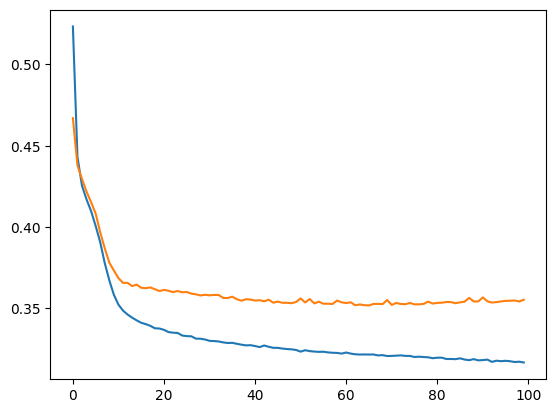

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

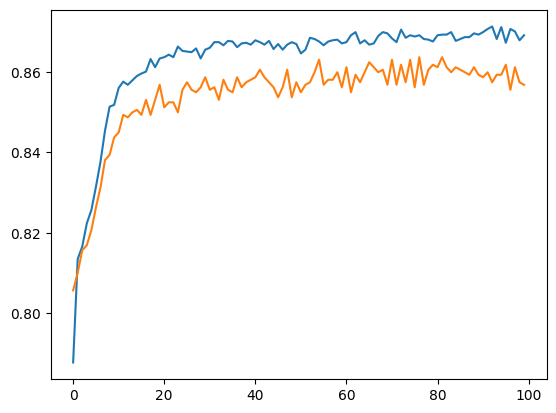

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])